<a href="https://colab.research.google.com/github/FelipeZarate14/Mineria_de_Datos/blob/main/ImplementaciondeModeloAsociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 Reglas de Asociación**
## **Objetivo:** Identificar patrones que se repiten en estudiantes con alto desempeño.
Ejemplos
- “Tomó caurso de preparación” + “Almuerzo estándar” → “Alto rendimiento”
-  “Padres con educación universitaria” → “Promedio alto”


Algoritmo
- Apriori
- Métricas: Soporte, Confianza, Lift

In [29]:

import pandas as pd
#Librerias para Asociacoin
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Cargar el DataSet
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')

#Ver el Dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **PREPROCESAMIENTO PARA REGLAS DE ASOCIACIÓN**

In [32]:
# Crear tu variable de desempeño general del estudiante

df["promedio_total"] = round((df['math score'] +
                              df['reading score'] +
                              df['writing score'])
                              /3,2)
df

df['nivel_academico'] = pd.cut(
    df['promedio_total'],
    bins=[0, 80, 100],
    labels=['bajo_desempño', 'alto_desempeño'],
    include_lowest=True
)
df




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio_total,nivel_academico
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,bajo_desempño
1,female,group C,some college,standard,completed,69,90,88,82.33,alto_desempeño
2,female,group B,master's degree,standard,none,90,95,93,92.67,alto_desempeño
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,bajo_desempño
4,male,group C,some college,standard,none,76,78,75,76.33,bajo_desempño
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,alto_desempeño
996,male,group C,high school,free/reduced,none,62,55,55,57.33,bajo_desempño
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,bajo_desempño
998,female,group D,some college,standard,completed,68,78,77,74.33,bajo_desempño


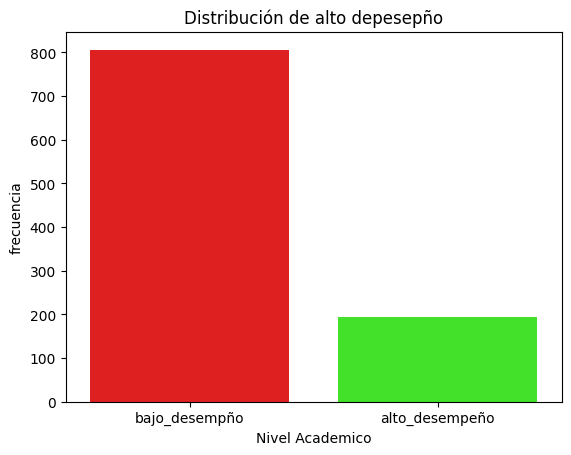

,frecuencia,porcentaje
nivel_academico,,
bajo_desempño,806,80.6
alto_desempeño,194,19.4


In [33]:
#Gráficos de barras para variables categóricas.
nivel_academico_df = pd.DataFrame({
    "frecuencia": df['nivel_academico'].value_counts(),
    "porcentaje": df['nivel_academico'].value_counts(normalize=True) * 100
})


gender_barplot = df['nivel_academico'].value_counts().reset_index()
gender_barplot.columns = ['nivel_academico', 'frecuencia']

sns.barplot(
    data=gender_barplot,
    x='nivel_academico',
    y='frecuencia',
    hue='nivel_academico',
    palette={'alto_desempeño':"#2dff0c", 'bajo_desempño':"#ff0000"},
    legend=False
)

plt.title("Distribución de alto depesepño")
plt.xlabel("Nivel Academico")
plt.show()
nivel_academico_df


Unicamente los alumnos que tienes **alto desempeño** (calificiacon mayor a 85) representan el **19.4%** de los **alumnos**

Se crea una columna nivel_academico nueva donde se evalua aquellos alumnos que destacan dandoles la variable de **alto_desempeño**, donde son alumnos excepcionales que tiene promedio_total mayor de 85

In [34]:
# Se crea un nuevo DataDrame con unicamente las variables categoricas

alumnos = df[["gender", "race/ethnicity", "parental level of education",
                   "lunch", "test preparation course", "nivel_academico"]]
alumnos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,nivel_academico
0,female,group B,bachelor's degree,standard,none,bajo_desempño
1,female,group C,some college,standard,completed,alto_desempeño
2,female,group B,master's degree,standard,none,alto_desempeño
3,male,group A,associate's degree,free/reduced,none,bajo_desempño
4,male,group C,some college,standard,none,bajo_desempño
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,alto_desempeño
996,male,group C,high school,free/reduced,none,bajo_desempño
997,female,group C,high school,free/reduced,completed,bajo_desempño
998,female,group D,some college,standard,completed,bajo_desempño


In [35]:
#Se genera la Transaccion

transactions = transactions = alumnos.applymap(str).values.tolist()
transactions = [[i for i in t if i != 'nan'] for t in transactions]
transactions



/tmp/ipython-input-3929851069.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions = alumnos.applymap(str).values.tolist()


[['female',
  'group B',
  "bachelor's degree",
  'standard',
  'none',
  'bajo_desempño'],
 ['female',
  'group C',
  'some college',
  'standard',
  'completed',
  'alto_desempeño'],
 ['female',
  'group B',
  "master's degree",
  'standard',
  'none',
  'alto_desempeño'],
 ['male',
  'group A',
  "associate's degree",
  'free/reduced',
  'none',
  'bajo_desempño'],
 ['male', 'group C', 'some college', 'standard', 'none', 'bajo_desempño'],
 ['female',
  'group B',
  "associate's degree",
  'standard',
  'none',
  'bajo_desempño'],
 ['female',
  'group B',
  'some college',
  'standard',
  'completed',
  'alto_desempeño'],
 ['male', 'group B', 'some college', 'free/reduced', 'none', 'bajo_desempño'],
 ['male',
  'group D',
  'high school',
  'free/reduced',
  'completed',
  'bajo_desempño'],
 ['female', 'group B', 'high school', 'free/reduced', 'none', 'bajo_desempño'],
 ['male',
  'group C',
  "associate's degree",
  'standard',
  'none',
  'bajo_desempño'],
 ['male',
  'group D',
  

In [36]:
# 20 items con mayor frecuencia

from collections import Counter

items = Counter()
for trans in transactions:
    items.update(trans)

items_df = pd.DataFrame(items.items(), columns=["Item", "Frecuencia"]) \
             .sort_values(by="Frecuencia", ascending=False)

items_df.head(20)


,Item,Frecuencia
5,bajo_desempño,806
3,standard,645
4,none,642
0,female,518
11,male,482
8,completed,358
14,free/reduced,355
6,group C,319
15,group D,262
7,some college,226


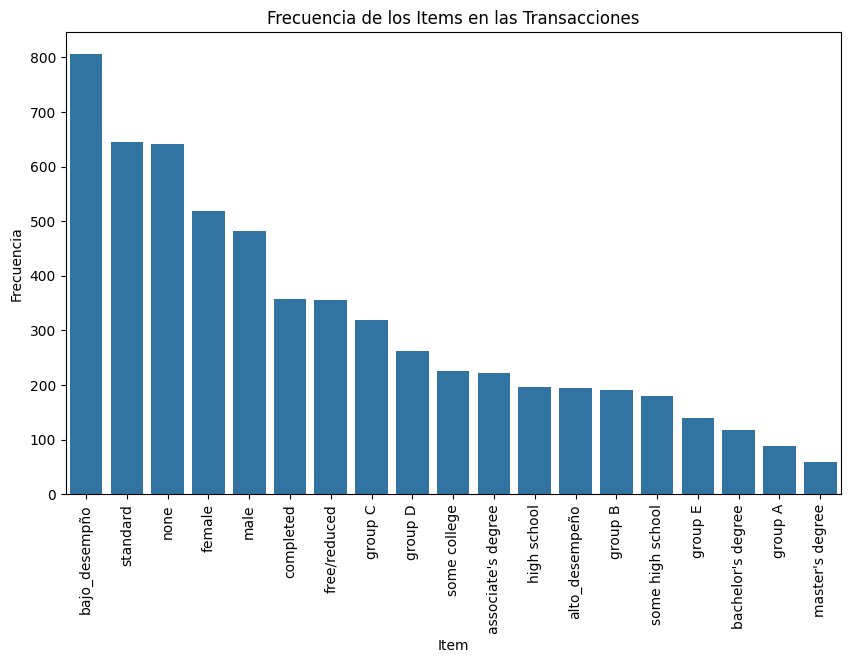

In [37]:
#Graficar la frecuencia

plt.figure(figsize=(10, 6))
sns.barplot(x="Item", y="Frecuencia", data=items_df)
plt.title("Frecuencia de los Items en las Transacciones")
plt.xlabel("Item")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

- El ítem con mayor frecuencia es **bajo_desempeño**. Si bien muchos estudiantes obtienen calificaciones aprobatorias, una gran parte no alcanza un promedio_total igual o superior a 85, que es el criterio definido para clasificar como alto desempeño.
- E segundo ítem más frecuente es **standard**, correspondiente al tipo de lunch.
- El ítem **none**, también muy frecuente, representa la ausencia de un curso de preparación. Es decir, una proporción importante de alumnos no realizó actividades de estudio previas para los exámenes.

In [38]:
# Distribución de items por transacción
item_counts = [len(transaction) for transaction in transactions]
item_counts_serie = pd.Series(item_counts)
item_counts_serie.describe(percentiles=[.05, .25, .50, .75, .90])

,0
count,1000.0
mean,6.0
std,0.0
min,6.0
5%,6.0
25%,6.0
50%,6.0
75%,6.0
90%,6.0
max,6.0


In [39]:
# Converitr transacciones en una matriz one-hot
# Una matriz one-hot es una forma de convertir las variables categoricas en binarios (0-1) para poder encontrar reglas de asociación.

from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)
onehot_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   alto_desempeño      1000 non-null   bool 
 1   associate's degree  1000 non-null   bool 
 2   bachelor's degree   1000 non-null   bool 
 3   bajo_desempño       1000 non-null   bool 
 4   completed           1000 non-null   bool 
 5   female              1000 non-null   bool 
 6   free/reduced        1000 non-null   bool 
 7   group A             1000 non-null   bool 
 8   group B             1000 non-null   bool 
 9   group C             1000 non-null   bool 
 10  group D             1000 non-null   bool 
 11  group E             1000 non-null   bool 
 12  high school         1000 non-null   bool 
 13  male                1000 non-null   bool 
 14  master's degree     1000 non-null   bool 
 15  none                1000 non-null   bool 
 16  some college        1000 non-null   bool 
 

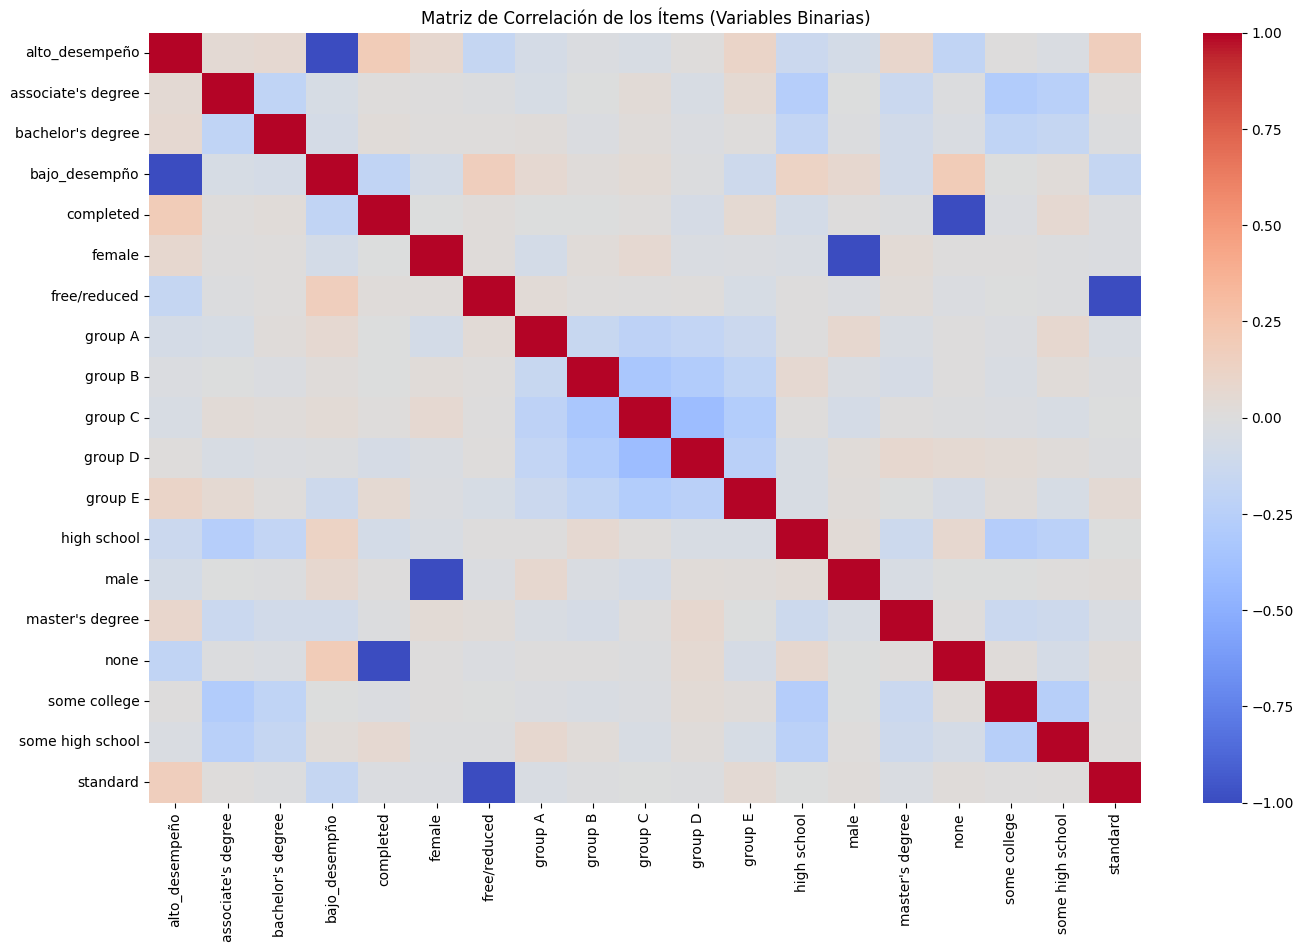

In [40]:
#Matriz de correlacion de los items

onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)
plt.figure(figsize=(16, 10))
sns.heatmap(onehot_df.corr(), cmap="coolwarm")
plt.title("Matriz de Correlación de los Ítems (Variables Binarias)")
plt.show()



La matriz de correlación permite identificar relaciones entre los distintos ítems categóricos. Si bien los resultados no dan valores altos de correlaciom, ofrecen información clave para anticipar posibles reglas de asociación.

1. Tipo de almuerzo
- lunch_standard → asociado a mayor rendimiento (~0.25)
- free/reduced → asociado a mayor probabilidad de bajo rendimiento (~0.25)


*El tipo de almuerzo puede reflejar diferencias socioeconómicas que influyen en el desempeño académico.*
*Los alumnos con almuerzo estándar tienden a tener mejor rendimiento que quienes reciben almuerzo gratuito o reducido.*

2. Curso de preparación

- completed → correlación positiva con niveles altos de lectura y escritura

- completed  → correlación negativa con bajo desemepeño general (-1)

Interpretación:

Completar el curso de preparación se asocia moderadamente con un mejor rendimiento académico, especialmente en habilidades verbales y es probable no tener un desempeño malo en nivel general


In [41]:
# Iidentificar cuáles características son más frecuentes entre los estudiantes

item_support = onehot_df.mean().sort_values(ascending=False)
item_support



,0
bajo_desempño,0.806
standard,0.645
none,0.642
female,0.518
male,0.482
completed,0.358
free/reduced,0.355
group C,0.319
group D,0.262
some college,0.226


**MÉTRICA DE SOPORTE**

In [42]:
# Calcular el sporte minimo para encontrar patrones de alto desemepeño
(df['nivel_academico'] == 'alto_desempeño').mean()



np.float64(0.194)

## **METRICAS DE APRIORI**

Para que **Apriori** pueda encontrar itemsets que incluyan alto_desempeño, el min_support debe ser menor o igual a 0.194.
Si se pone un soporte mínimo mayor, nunca aparecería ningún itemset con alto_desempeño.
se usara un soporte de 0.1

In [43]:
# Identificar los itemsets frecuentes
soporte = 0.10

itemsets = apriori(onehot_df, min_support=0.05, use_colnames=True)
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

print(f"Número de itemsets: {itemsets.shape[0]}")

itemsets.sort_values(by="support", ascending=False)


Número de itemsets: 291


,support,itemsets
3,0.806,(bajo_desempño)
18,0.645,(standard)
15,0.642,(none)
51,0.553,"(none, bajo_desempño)"
5,0.518,(female)
...,...,...
32,0.050,"(group D, associate's degree)"
245,0.050,"(bajo_desempño, group C, female, completed)"
243,0.050,"(female, none, standard, associate's degree)"
260,0.050,"(none, bajo_desempño, female, some high school)"


In [44]:
# Top 10 de los itemsets con al menos 2 items
itemsets[itemsets["itemsets"].apply(lambda x: len(x) >= 2)] \
    .sort_values(by="support", ascending=False) \
    .head(10)

,support,itemsets
51,0.553,"(none, bajo_desempño)"
54,0.488,"(bajo_desempño, standard)"
112,0.418,"(none, standard)"
50,0.403,"(bajo_desempño, male)"
42,0.403,"(bajo_desempño, female)"
187,0.341,"(none, bajo_desempño, standard)"
72,0.334,"(none, female)"
75,0.329,"(female, standard)"
43,0.318,"(free/reduced, bajo_desempño)"
109,0.316,"(male, standard)"


In [45]:
#Itemset que contengan lunch alto_desempeño

itemsets[itemsets["itemsets"].apply(lambda x: "alto_desempeño" in list(x))]\
.sort_values(by="support", ascending=False)




,support,itemsets
0,0.194,(alto_desempeño)
26,0.157,"(alto_desempeño, standard)"
21,0.115,"(alto_desempeño, female)"
20,0.105,"(alto_desempeño, completed)"
118,0.090,"(female, alto_desempeño, standard)"
25,0.089,"(none, alto_desempeño)"
116,0.080,"(alto_desempeño, standard, completed)"
24,0.079,"(male, alto_desempeño)"
120,0.077,"(none, alto_desempeño, standard)"
119,0.067,"(male, alto_desempeño, standard)"


Los itemsets que aparecen junto a **alto_desempeño** son
- Tipo de Lunch **standard**  

- Genero **female**  

- Curso **completed**

Estos tres ítems tienen un soporte elevado por sí mismos, lo que les permite aparecer de forma repetida en los itemsets, lo que confirma que el algoritmo **Apriori** está funcionando correctamente conforme a su principio fundamental.



### **CÁLCULO DE LA CONFIDENCE**
Para calcular la Confidence tomaremos los valores del soporte de **alto_desempeño = 0.194** y el seguno item mas fuertte que es **standard = 0.645**  

- Soporte(alto_desempeño) ≈ 0.194  
- Soporte(standard) ≈ 0.645  
- Soporte(standard ∧ alto_desempeño) ≈ 0.157  

La confianza se calcula como:

![image.png](attachment:image.png)

 Este valor asegura que las reglas generadas tengan una probabilidad razonable de que el consecuente ocurra cuando aparece el antecedente.


In [46]:
#Crear las reglas de asociación (Confianza minima de 24%
confidence = 0.24
rules = association_rules(itemsets, metric="confidence", min_threshold=confidence)
print(f"Numero de reglas: {rules.shape[0]}")
rules.sort_values(by="confidence", ascending=False)



Numero de reglas: 995


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
750,"(free/reduced, group C, male)",(bajo_desempño),0.052,0.806,0.051,0.980769,1.216835,1.0,0.009088,10.088000,0.187971,0.063197,0.900872,0.522022
757,"(none, free/reduced, group C)",(bajo_desempño),0.071,0.806,0.069,0.971831,1.205746,1.0,0.011774,6.887000,0.183679,0.085396,0.854799,0.528719
773,"(none, free/reduced, male)",(bajo_desempño),0.105,0.806,0.102,0.971429,1.205246,1.0,0.017370,6.790000,0.190273,0.126082,0.852725,0.548990
302,"(none, group A)",(bajo_desempño),0.058,0.806,0.056,0.965517,1.197912,1.0,0.009252,5.626000,0.175387,0.069307,0.822254,0.517498
299,"(free/reduced, some high school)",(bajo_desempño),0.061,0.806,0.058,0.950820,1.179677,1.0,0.008834,3.944667,0.162205,0.071693,0.746493,0.511390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"(none, bajo_desempño, male)",(some college),0.277,0.226,0.067,0.241877,1.070253,1.0,0.004398,1.020943,0.090791,0.153670,0.020513,0.269169
159,"(bajo_desempño, group C)",(associate's degree),0.265,0.222,0.064,0.241509,1.087880,1.0,0.005170,1.025721,0.109906,0.151300,0.025076,0.264899
217,"(bajo_desempño, completed)",(group D),0.253,0.262,0.061,0.241107,0.920255,1.0,-0.005286,0.972469,-0.103947,0.134361,-0.028311,0.236966
247,"(bajo_desempño, female)",(group D),0.403,0.262,0.097,0.240695,0.918682,1.0,-0.008586,0.971941,-0.129122,0.170775,-0.028869,0.305462


Muestra de metricas Lifg

In [47]:
#Mostrar las reglas que tengan como concecuentes alto_desempeño
rules[rules["consequents"].apply(lambda x: "alto_desempeño" in x)].sort_values(by="confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
136,"(standard, completed)",(alto_desempeño),0.227,0.194,0.080,0.352423,1.816613,1.0,0.035962,1.244639,0.581533,0.234604,0.196554,0.382397
132,"(female, completed)",(alto_desempeño),0.184,0.194,0.057,0.309783,1.596818,1.0,0.021304,1.167748,0.458032,0.177570,0.143651,0.301799
2,(completed),(alto_desempeño),0.358,0.194,0.105,0.293296,1.511836,1.0,0.035548,1.140506,0.527340,0.234899,0.123196,0.417267
142,"(standard, female)",(alto_desempeño),0.329,0.194,0.090,0.273556,1.410084,1.0,0.026174,1.109515,0.433416,0.207852,0.098705,0.368737
9,(standard),(alto_desempeño),0.645,0.194,0.157,0.243411,1.254695,1.0,0.031870,1.065307,0.571813,0.230205,0.061304,0.526345


<Axes: xlabel='support', ylabel='confidence'>

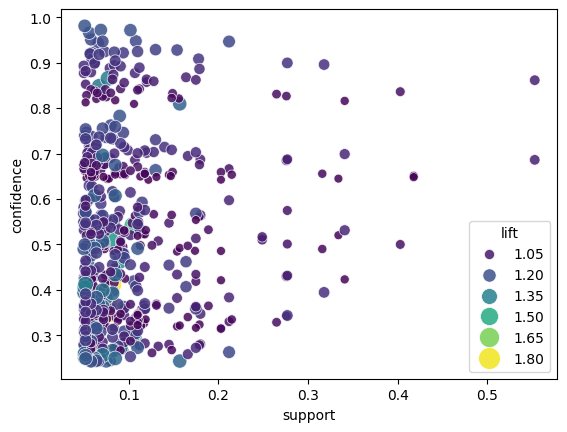

In [48]:
rules_filtradas = rules[rules["lift"] > 1]

sns.scatterplot(
    data=rules_filtradas,
    x="support",
    y="confidence",
    hue="lift",
    size="lift",
    sizes=(40, 250),
    palette="viridis",
    alpha=0.85
)


Tomando en cuenta que el dataset contiene muchos atributos categóricos y que el número total de combinaciones posibles entre ellos es muy alto, es normal que la mayoría de los valores de support aparezcan concentrados entre 0.0 y 0.12. Esto no significa que las reglas sean débiles, sino que cada combinación específica ocurre pocas veces, aun cuando sea una asociación válida. Por esta razón, la gráfica muestra casi todos los puntos alineados verticalmente en la zona de soporte bajo.

A pesar de este soporte reducido, la gráfica evidencia que muchas reglas presentan valores altos de confidence, llegando incluso al rango de 0.8 a 1.0, lo que indica que, cuando los antecedentes se cumplen, sus consecuentes ocurren con alta probabilidad. Además, la presencia de lifts mayores a 1 confirma que estas asociaciones no son producto del azar, sino patrones reales dentro de los datos.

En otras palabras: aunque los soportes sean bajos por la naturaleza del dataset, las reglas siguen siendo confiables, y los valores altos de confianza y lift permiten identificar relaciones fuertes entre los atributos categóricos analizados.


<Axes: xlabel='support', ylabel='confidence'>

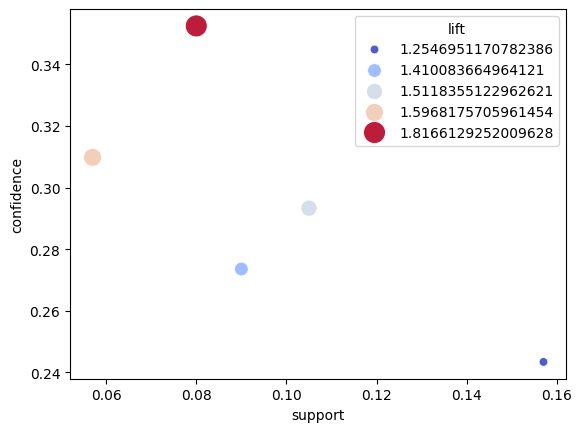

In [49]:
rules_alto = rules[
    rules["consequents"].apply(lambda x: "alto_desempeño" in x)
]

sns.scatterplot(
    data=rules_alto,
    x="support",
    y="confidence",
    hue="lift",
    size="lift",
    sizes=(40, 250),
    palette="coolwarm",
    alpha=0.9
)


Esta gráfica de dispersión toma en cuenta únicamente las reglas cuya consecuencia es alto_desempeño, por lo que todos los puntos representan tanto ítems individuales como combinaciones de ítems como antecedentes, que derivan específicamente en un alto rendimiento académico. El soporte aparece bajo porque el grupo de estudiantes con alto desempeño representa menos del 20% del total; por ello, cualquier regla que los incluya se refleja con valores reducidos en este eje.

Aun así, se observan dos reglas con valores de lift especialmente altos (≈ 1.59 y ≈ 1.81). Esto indica que dichos antecedentes incrementan entre un 59% y un 81% la probabilidad de que ocurra el consecuente alto_desempeño, en comparación con lo que se esperaría por puro azar.

In [50]:
top_rules_alto = rules_alto.sort_values(by='lift', ascending=False).head(10)


<Figure size 1000x600 with 0 Axes>

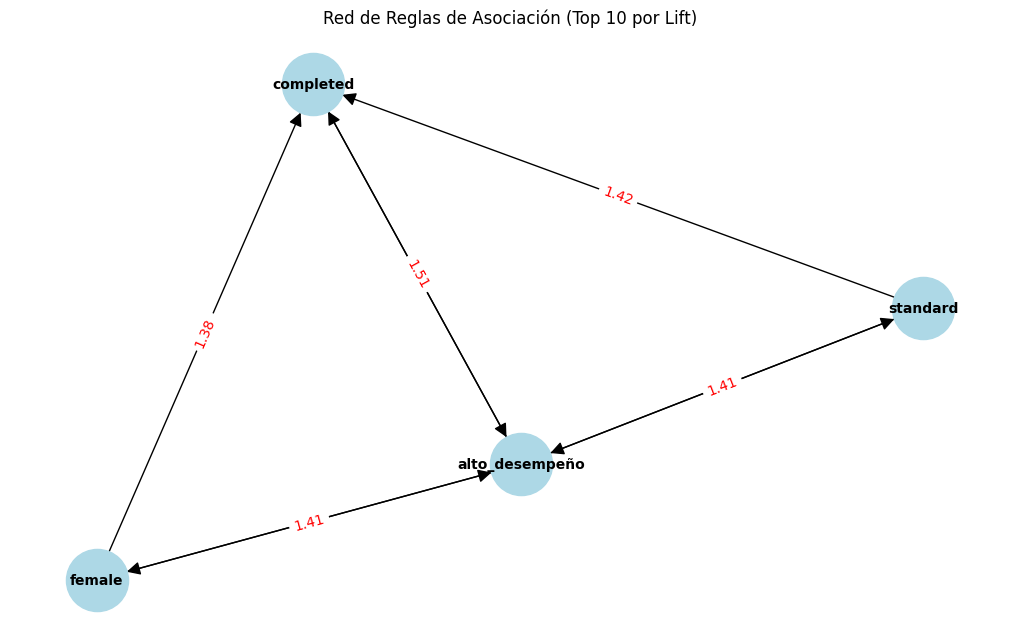

In [51]:
import networkx as nx
plt.figure(figsize=(10, 6))

G = nx.DiGraph()

# Construir nodos y aristas SOLO para alto desempeño
for _, row in top_rules_alto.iterrows():
    for ant in row['antecedents']:
        G.add_edge(ant, 'alto_desempeño', weight=row['lift'])

# Layout del grafo

#Red de reglas de asociación (usando networkx)
import networkx as nx

# Crear el grafo
G = nx.DiGraph()

# Agregar nodos y aristas de las reglas top N
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

# Dibujar el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()}, font_color='red')
plt.title("Red de Reglas de Asociación (Top 10 por Lift)")
plt.show()



Los antecedentes con mayor lift fueron completed, female y standard. Esto significa que, cuando alguno de estos antecedentes está presente, la probabilidad de que un estudiante tenga alto desempeño aumenta

/tmp/ipython-input-2522595777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_rules['antecedent'] = pair_rules['antecedents'].apply(lambda x: next(iter(x)))
/tmp/ipython-input-2522595777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_rules['consequent'] = pair_rules['consequents'].apply(lambda x: next(iter(x)))


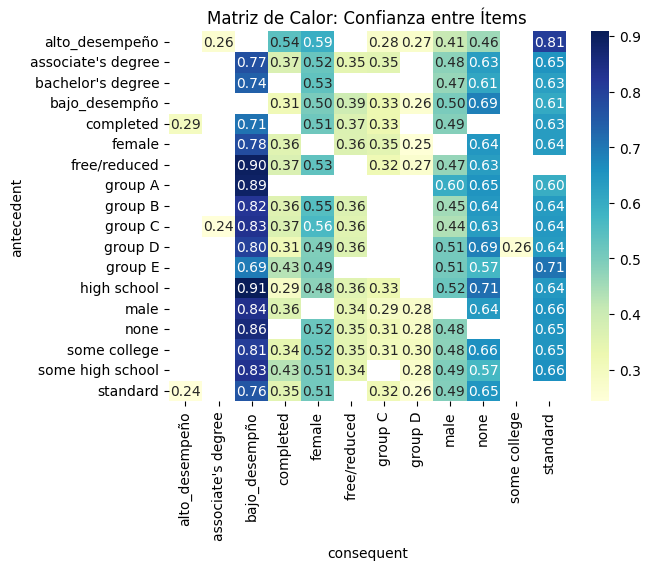

In [52]:

#Matriz de Calor de Confianza entre Pares
# Crear DataFrame de pares con confianza
pair_rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) &
                   rules['consequents'].apply(lambda x: len(x) == 1)]

pair_rules['antecedent'] = pair_rules['antecedents'].apply(lambda x: next(iter(x)))
pair_rules['consequent'] = pair_rules['consequents'].apply(lambda x: next(iter(x)))

pivot = pair_rules.pivot(index='antecedent', columns='consequent', values='confidence')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de Calor: Confianza entre Ítems")
plt.show()

El análisis de reglas de asociación permitió identificar patrones consistentes en los estudiantes con alto desempeño. Entre los ítems más fuertemente asociados destacan: tipo de lunch “standard”, sexo femenino y nivel educativo parental medio–alto (associate’s y bachelor’s degree). Asimismo, los estudiantes de alto desempeño presentan mayores probabilidades de completar el curso. Estos patrones, tanto por confianza (0.70–0.81) como por lift (1.38–1.42), aportan información útil para caracterizar al grupo de alto desempeño dentro del dataset, cumpliendo el objetivo de esta etapa del proyecto.